## Exercise on image processing

In [1]:
#pip install opencv-pytho
!pip3 install opencv-python

In [21]:
# import image library: either CV2 or PIL
import cv2 
# from PIL import Image, ImageOps
import math

import numpy as np
from matplotlib import pyplot as plt

### Loading and resize image

In [3]:
# load image, 0  is for gray scale
img = cv2.imread('pygmy-slow-loris.jpg', 0)
# img = Image.open('pygmy-slow-loris.jpg') #PIL
# img = ImageOps.grayscale(img)        #PIL

In [4]:
# visualisation function
def show_image(image):
    # image view
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap='gray')
    plt.show()
    # pixel view
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

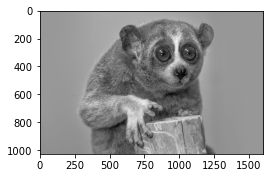

image size:  (1027, 1600)
pixel matrix:
 [[152 152 152 ... 151 151 151]
 [152 152 152 ... 151 151 151]
 [152 152 152 ... 151 151 151]
 ...
 [142 142 142 ... 151 151 151]
 [142 142 142 ... 151 151 151]
 [142 142 142 ... 151 151 151]]


In [5]:
show_image(img)

In [6]:
# Resize image
SIZE = 320
img = cv2.resize(img, (SIZE, SIZE)) #cv2
# img = img.resize(size=(SIZE, SIZE)) #PIL

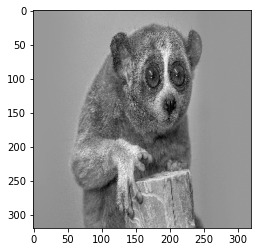

image size:  (320, 320)
pixel matrix:
 [[152 152 152 ... 150 151 151]
 [152 152 152 ... 151 151 151]
 [152 152 152 ... 151 151 151]
 ...
 [142 142 142 ... 151 150 151]
 [142 142 142 ... 151 152 151]
 [142 142 142 ... 152 150 151]]


In [7]:
show_image(img)

### Pool the image

In [8]:
# devide the whole matrix into pools
def get_pools(mat: np.array, pool: int, stride: int)-> np.array:
    # To score individual pools
    pools = []
    # For all rows with the step size of stride (row 0, column 2)
    for i in np.arange(mat.shape[0], step = stride):
        # for all columns with the step size of stade (column 0 and row 2)
        for j in np.arange(mat.shape[1], step=stride):
            # Get a single pool
            # First  - Image[0:2, 0:2] -> [[10, 12], [ 4, 11]]
            # Second - Image[0:2, 2:4] -> [[ 8,  7], [ 5,  9]]
            # Third  - Image[2:4, 0:2] -> [[18, 13], [ 3, 15]]
            # Fourth - Image[2:4, 2:4] -> [[ 7,  7], [ 2,  2]]
            output = mat[i:i+pool, j:j+pool]
            
            # Ensure that the shape of matrix is 2x2 (pool size)
            if output.shape == (pool, pool):
                # append to the list of pools
                pools.append(output)
    
    # Return all pools as Numpy array
    return np.array(pools)

In [9]:
# Create pools
slow_lories_pool = get_pools(mat=np.array(img), pool=4, stride=2)
slow_lories_pool

array([[[152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152]],

       [[152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152]],

       [[152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152],
        [152, 152, 152, 152]],

       ...,

       [[151, 150, 151, 152],
        [152, 151, 152, 151],
        [151, 152, 152, 151],
        [150, 153, 151, 152]],

       [[151, 152, 152, 151],
        [152, 151, 151, 151],
        [152, 151, 151, 151],
        [151, 152, 152, 152]],

       [[152, 151, 150, 152],
        [151, 151, 150, 151],
        [151, 151, 152, 151],
        [152, 152, 150, 151]]], dtype=uint8)

In [10]:
slow_lories_pool.shape

(25281, 4, 4)

In [13]:
# Calculate the max value of each pool and reshape the pools into the desired aoutput shape
def max_pooling(pools: np.array) -> np.array:
    # total number of pools
    num_pools = pools.shape[0]
    # reshape the pools to a matrix - Square root of the number of pools
    # cast the result to int, as Numpy returns sqrt() as float
    # for example: np.sqrt(16) = 4.0 -> int(4.0) = 4
    target_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))
    # to store the max values
    pooled = []
    
    # iterate over all pools
    for pool in pools:
        # append the max value only
        pooled.append(np.max(pool))
        
    # Reshape to target shape
    return np.array(pooled).reshape(target_shape)



In [14]:
# Apply max-pooling
slow_lories_max_pool = max_pooling(pools= slow_lories_pool)
slow_lories_max_pool

array([[152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       ...,
       [143, 143, 143, ..., 153, 152, 152],
       [143, 143, 143, ..., 152, 152, 152],
       [143, 143, 143, ..., 153, 152, 152]], dtype=uint8)

In [15]:
slow_lories_max_pool.shape

(159, 159)

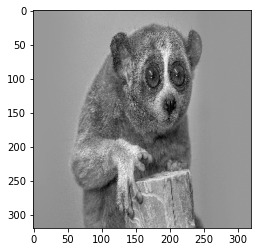

image size:  (320, 320)
pixel matrix:
 [[152 152 152 ... 150 151 151]
 [152 152 152 ... 151 151 151]
 [152 152 152 ... 151 151 151]
 ...
 [142 142 142 ... 151 150 151]
 [142 142 142 ... 151 152 151]
 [142 142 142 ... 152 150 151]]


In [16]:
# show pooled image
show_image(img)

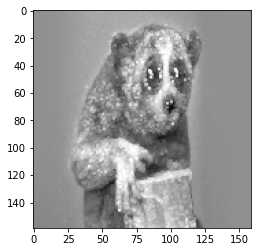

image size:  (159, 159)
pixel matrix:
 [[152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 ...
 [143 143 143 ... 153 152 152]
 [143 143 143 ... 152 152 152]
 [143 143 143 ... 153 152 152]]


In [17]:
# Show pooled image
show_image(slow_lories_max_pool)

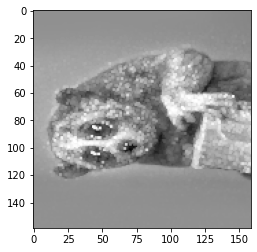

image size:  (159, 159)
pixel matrix:
 [[152 152 152 ... 143 143 143]
 [152 152 152 ... 143 143 143]
 [152 152 152 ... 143 143 143]
 ...
 [152 152 152 ... 153 152 153]
 [152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]]


In [18]:
# show transposed image
show_image(slow_lories_max_pool.T)

In [20]:
# Create another pool
slow_lories_pool = get_pools(mat=np.array(slow_lories_max_pool), pool=3, stride=3)
slow_lories_pool

array([[[152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       [[152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       [[152, 152, 152],
        [152, 152, 152],
        [152, 152, 152]],

       ...,

       [[153, 153, 152],
        [153, 153, 152],
        [152, 152, 152]],

       [[152, 152, 153],
        [152, 152, 152],
        [152, 152, 153]],

       [[153, 152, 152],
        [152, 152, 152],
        [153, 152, 152]]], dtype=uint8)

## Convolute

In [25]:
# Convolute function
import math
def get_conv(mat, kernel):
    conv = []
    for m in mat:
        conv.append(
        np.sum(np.multiply(m, kernel)))
    resh_size = int(math.sqrt(mat.shape[0]))
    conv = np.array(conv).reshape(resh_size, resh_size)
    return conv

In [26]:
# Edge detection
kernel = [[-1, -1, -1],[-1, 12, -1], [-1, -1, -1]]

In [27]:
transformed = get_conv(slow_lories_pool, kernel)

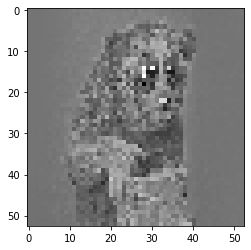

image size:  (53, 53)
pixel matrix:
 [[608 608 608 ... 616 617 608]
 [608 608 608 ... 613 617 616]
 [608 608 608 ... 608 615 607]
 ...
 [576 583 569 ... 616 607 606]
 [579 577 576 ... 617 606 606]
 [572 572 572 ... 617 606 606]]


In [28]:
show_image(transformed)